# Movie Review Classification with TF-IDF Vectorize & SVC ...

### ... Given a set of text movie reviews that have been labeled negative or positive

For more information on this dataset visit http://ai.stanford.edu/~amaas/data/sentiment/

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../DATA/moviereviews.csv')

In [3]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


**Check to see if there are any missing values in the dataframe.**

In [4]:
# Check for NaN values:
df.isnull().sum()

label      0
review    35
dtype: int64

**Remove any reviews that are NaN**

In [5]:
df = df.dropna()

**Check to see if any reviews are blank strings and not just NaN.**

In [6]:
df['review'].str.isspace().sum()

27

In [7]:
df[df['review'].str.isspace()]

,label,review
57,neg,
71,pos,
147,pos,
151,pos,
283,pos,
307,pos,
313,neg,
323,pos,
343,pos,
351,neg,


In [8]:
df = df[~df['review'].str.isspace()]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


**Confirm the value counts per label:**

In [10]:
df['label'].value_counts()

neg    969
pos    969
Name: label, dtype: int64

## EDA on Bag of Words

**I wanna figure out how to use a CountVectorizer model to get the top 20 words (that are not english stop words) per label type.**

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
cv = CountVectorizer(stop_words='english')

In [13]:
matrix = cv.fit_transform(df[df['label']=='neg']['review'])
freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print("Top 20 words used for Negative reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Negative reviews.
[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


In [14]:
matrix = cv.fit_transform(df[df['label']=='pos']['review'])
freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print("Top 20 words used for Positive reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Positive reviews.
[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


### Training and Data

**Splitting the data into features and a label (X and y) and then preform a train/test split.**

In [15]:
from sklearn.model_selection import train_test_split

X = df['review']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Training a Model

**Creating a PipeLine that will both create a TF-IDF Vector out of the raw text data and fit a supervised learning model of my choice. Then I fit that pipeline on the training data.**

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

In [17]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),('svc', LinearSVC()),])

In [18]:
# Feed the training data through the pipeline
pipe.fit(X_train, y_train)  

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

**Creating a classification report and plot a confusion matrix based on the results of my PipeLine.**

In [19]:
from sklearn.metrics import classification_report,plot_confusion_matrix

In [20]:
preds = pipe.predict(X_test)

In [21]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         neg       0.81      0.86      0.83       191
         pos       0.85      0.81      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



''

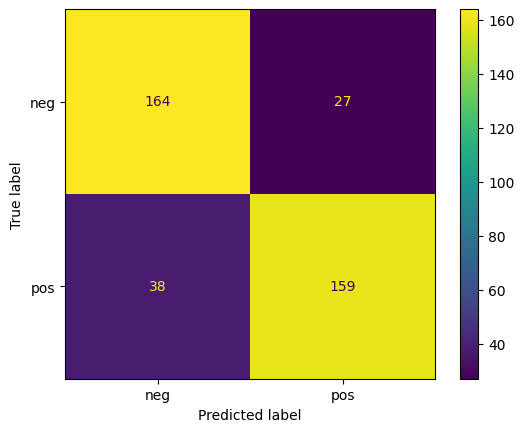

In [23]:
plot_confusion_matrix(pipe,X_test,y_test)
;

# THE END